#Image Import

- stand1500 : https://drive.google.com/drive/folders/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio?usp=sharing 
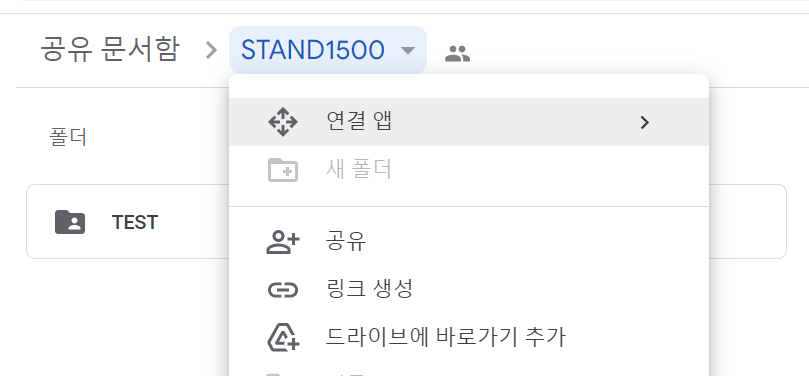
- 드라이브에 바로가기 추가 -> 내 드라이브 -> 폴더생성(DATA) -> 생성된 폴더 안에 바로가기추가

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') # 드라이브 마운트

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/MyDrive/DATA/STAND1500/TRAIN
import os
dr= os.getcwd() #현재 위치 주소
drD=""
drD=dr+"/*/*.jpg"

/content/gdrive/.shortcut-targets-by-id/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio/STAND1500/TRAIN


In [5]:
pwd # 현위치 확인

'/content/gdrive/.shortcut-targets-by-id/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio/STAND1500/TRAIN'

##Loading library

- YOLO 모델 : 영역을 표시하고 뿐만 아니라 인식된 사물이 어떤것인지 까지 알려주는 모델

In [6]:
%cd /content/
!git clone https://github.com/dhrim/darkeras-yolov4
%cd darkeras-yolov4
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

/content
Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 14.98 MiB/s, done.
Resolving deltas: 100% (82/82), done.
/content/darkeras-yolov4
--2022-09-15 11:04:55--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  71.7MB/s    in 3.5s    

2022-09-15 11:04:59 (66.7 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



##Model loading

In [7]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")
model.save("yolov3.h5")

#Image Crop + Save crop data
- 학습 속도가 더욱 빨라지도록 사람을 인식하고 해당되는 영역만 자름
- 자른 데이터가 저장되도록 드라이브의 첫화면에 DATA0829/STAND1500/TRAIN/GOOD, BAD1, BAD2, BAD3 를 생성해줌

In [8]:
print(dr) # 현위치 확인

/content/gdrive/.shortcut-targets-by-id/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio/STAND1500/TRAIN


In [9]:
import glob #glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다.

for filename in glob.glob(dr):
  print(filename)
  name_list = filename.split("/")
  print(name_list)

/content/gdrive/.shortcut-targets-by-id/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio/STAND1500/TRAIN
['', 'content', 'gdrive', '.shortcut-targets-by-id', '1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio', 'STAND1500', 'TRAIN']


In [10]:
print(name_list[len(name_list) - 1])
print(drD)
print(name_list)
print(name_list[len(name_list) - 2])

TRAIN
/content/gdrive/.shortcut-targets-by-id/1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio/STAND1500/TRAIN/*/*.jpg
['', 'content', 'gdrive', '.shortcut-targets-by-id', '1YGz7J9x5LE3QKOB6-HJi_--NIH2UxZio', 'STAND1500', 'TRAIN']
STAND1500


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

import core
import colorsys
import random


def draw_bbox(file_name1, bboxes, show_label=True):
    Msc=[0]
  
    try:
        classes = class_names #classes : 딕셔너리 가능 항목 가져옴 num:str
    except NameError:
        classes = core.utils.read_class_names("./data/classes/coco.names")
    num_classes = len(classes)
    image_h, image_w, _ = file_name1.shape#이미지 크기

    hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

    random.seed(0)
    random.shuffle(colors)
    random.seed(None)

    for i, bbox in enumerate(bboxes):#indexing(count, list v)
        coor = np.array(bbox[:4], dtype=np.int32)
        
        fontScale = 0.5
        score = bbox[4]
        Msc=np.append(Msc,score)
        class_ind = int(bbox[5])

        if classes[class_ind] in "person" :
          if score>=np.max(Msc):
            bbox_color = colors[class_ind]
            bbox_thick = int(0.5 * (image_h + image_w) / 600)
            c1, c2 = (coor[0], coor[1]), (coor[2], coor[3]) 
            print(c1,"/",c2)
            cv2.rectangle(file_name1, c1, c2, bbox_color, bbox_thick)
            score=np.max(Msc)
            print('%s'%classes[class_ind],"SC",score)
            bbox_mess = '%s: %.2f' % (classes[class_ind], score)#출력되는 text
            t_size = cv2.getTextSize(bbox_mess, 0, fontScale, thickness=bbox_thick//2)[0]

            c1_1= (c1[0] + t_size[0], c1[1] - t_size[1] - 3)
            PP=file_name1[c1[1]:c2[1],c1[0]:c2[0]]

            cv2.rectangle(file_name1,c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3-100), bbox_color,0)  # filled#labeling2
            #이미지S 파일,시작점(x,y),종료점(x,y)
            PP = cv2.cvtColor(PP, cv2.COLOR_RGB2BGR) # 색상 변경
            cv2.imwrite("/content/gdrive/MyDrive/DATA0829/STAND1500/TRAIN/" +name_list[len(name_list) - 2]+"/"+ name_list[len(name_list) - 1], PP) # 사람 부분만 이미지 추출 #자기의 tmp 폴더에 good 폴더 미리 생성 
    return file_name1

In [ ]:
for file_name in glob.glob(drD):  # "현 디렉터리"의 모든 사진들을 불러옴
  print(file_name)
  name_list = file_name.split("/")
  new_filename = name_list[len(name_list) - 1] # 사진 파일 이름을 new_filename에 저장
  INPUT_SIZE = 800

  image_path = file_name
  file_name = cv2.imread(image_path)#이미지 파일 경로
  file_name = cv2.cvtColor(file_name, cv2.COLOR_BGR2RGB)#입력 이미지,색상 변환 코드

  plt.figure(figsize=(12,20))
  plt.imshow(file_name)
  plt.show()

  #2
  bboxes = model.predict(file_name)#keras코드에서 boundary box로 bounding 됨

  #3
  dummy = np.copy(file_name)
  print(bboxes)
  for box in bboxes:
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf = box[4]
    cls_id = int(box[5])
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)#빨간색, 선의 두께는 2

  plt.figure(figsize=(12,20))#(그래프 가로, 세로)
  file_name = draw_bbox(file_name, bboxes)
print("\nALL DONE")
  

#DEEP LEARNING(CNN)

- vanilla cnn을 사용, 가장 기본적으로 사용되는 방식
- 위에서 잘린 stnad 이미지 : https://drive.google.com/drive/folders/1emfX_5RaR7MvrP_pdgOhdYFrbp3ikPhF?usp=sharing
- 위를 실행하지 않고 CNN만 실행시키고 싶다면

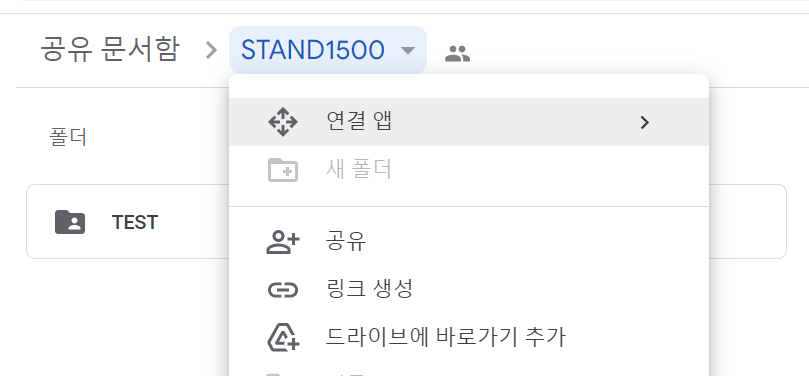
- 드라이브에 바로가기 추가 -> 내 드라이브 -> 폴더생성(DATA0829) -> 생성된 폴더 안에 바로가기추가

##Module importing

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l1, l2, L1L2
import time


from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2
import tensorflow as tf





In [26]:

model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [27]:
#실시간loss그래프
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [28]:
plot_losses = PlotLosses()

##Learning

In [30]:
#다중분류

from tensorflow .keras. optimizers import Adam
optimizer = Adam(learning_rate= 0.001*0.1, decay = 0.01 ) #lr
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 128

train_data_generator = ImageDataGenerator(
      # rotation_range=10,
      rotation_range=4, #bad1~3,good 4개
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "/content/gdrive/MyDrive/DATA0829/STAND1500/TRAIN",#학습시킬 경로
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "/content/gdrive/MyDrive/DATA0829/STAND1500/TEST", #test경로
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_112 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_93 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_114 (Conv2D)         (None, 112, 112, 128)    

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'pose_best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
#모델체크포인트

'''
tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch', options=None, **kwargs
)
'''



"\ntf.keras.callbacks.ModelCheckpoint(\n    filepath, monitor='val_loss', verbose=0, save_best_only=False,\n    save_weights_only=False, mode='auto', save_freq='epoch', options=None, **kwargs\n)\n"

In [ ]:
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=250, callbacks=[model_check_point,plot_losses]
)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()
